<a href="https://colab.research.google.com/github/AbhinavKumar0000/Machine_learning_practice/blob/main/CNN_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Use pre trained model
https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

In [4]:
IMAGE_SHAPE = (224, 224)

# Define input layer
inputs = tf.keras.Input(shape=IMAGE_SHAPE + (3,))

# Wrap hub.KerasLayer in a Lambda layer
outputs = tf.keras.layers.Lambda(
    lambda x: hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", trainable=False)(x)
)(inputs)

# Create the model
classifier = tf.keras.Model(inputs, outputs)

# Print model summary
classifier.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

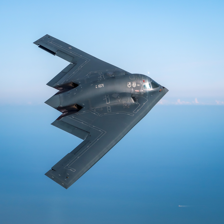

In [26]:
b2 = Image.open("B2BOMBER.jpg").resize(IMAGE_SHAPE)
b2

In [27]:
b2_array = np.array(b2)

array([[[136, 197, 241],
        [136, 197, 242],
        [136, 197, 241],
        ...,
        [129, 197, 242],
        [129, 196, 241],
        [129, 196, 241]],

       [[137, 198, 242],
        [137, 198, 242],
        [137, 198, 242],
        ...,
        [130, 197, 242],
        [130, 197, 242],
        [130, 197, 242]],

       [[137, 198, 242],
        [138, 198, 242],
        [139, 199, 243],
        ...,
        [131, 198, 243],
        [132, 198, 243],
        [132, 197, 243]],

       ...,

       [[ 64, 116, 154],
        [ 63, 115, 155],
        [ 65, 116, 154],
        ...,
        [ 46, 107, 144],
        [ 45, 107, 144],
        [ 45, 107, 144]],

       [[ 64, 115, 154],
        [ 64, 115, 154],
        [ 65, 116, 154],
        ...,
        [ 45, 106, 143],
        [ 44, 106, 143],
        [ 44, 106, 143]],

       [[ 64, 115, 154],
        [ 64, 115, 153],
        [ 65, 115, 152],
        ...,
        [ 45, 106, 143],
        [ 45, 106, 143],
        [ 44, 106, 143]]], dtype=uint8)
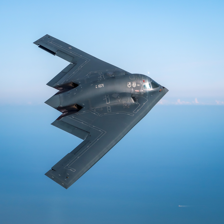

In [29]:
b2_array

In [30]:
b2_processed = tf.keras.applications.mobilenet_v2.preprocess_input(b2_array)  # processing according to our model named mobilenet_v2

In [32]:
b2_ready = b2_processed[np.newaxis, ...]   #adding new axis (1,24,24,3) means batch contains 1 image

In [33]:
b2_ready

array([[[[ 0.06666672,  0.54509807,  0.8901961 ],
         [ 0.06666672,  0.54509807,  0.8980392 ],
         [ 0.06666672,  0.54509807,  0.8901961 ],
         ...,
         [ 0.01176476,  0.54509807,  0.8980392 ],
         [ 0.01176476,  0.5372549 ,  0.8901961 ],
         [ 0.01176476,  0.5372549 ,  0.8901961 ]],

        [[ 0.07450986,  0.5529412 ,  0.8980392 ],
         [ 0.07450986,  0.5529412 ,  0.8980392 ],
         [ 0.07450986,  0.5529412 ,  0.8980392 ],
         ...,
         [ 0.0196079 ,  0.54509807,  0.8980392 ],
         [ 0.0196079 ,  0.54509807,  0.8980392 ],
         [ 0.0196079 ,  0.54509807,  0.8980392 ]],

        [[ 0.07450986,  0.5529412 ,  0.8980392 ],
         [ 0.082353  ,  0.5529412 ,  0.8980392 ],
         [ 0.09019613,  0.56078434,  0.90588236],
         ...,
         [ 0.02745104,  0.5529412 ,  0.90588236],
         [ 0.03529418,  0.5529412 ,  0.90588236],
         [ 0.03529418,  0.54509807,  0.90588236]],

        ...,

        [[-0.4980392 , -0.09019607,  0

In [34]:
b2_ready.shape

(1, 224, 224, 3)

In [35]:
result = classifier.predict(b2_ready)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [36]:
result.shape

(1, 1001)

In [37]:
result

array([[ 0.25512955,  1.663685  ,  1.2613715 , ..., -0.03877384,
        -0.08067807, -1.0204451 ]], dtype=float32)

In [38]:
predicted_label_index = np.argmax(result)
predicted_label_index

np.int64(896)

In [32]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [40]:
image_labels[896]

'warplane'

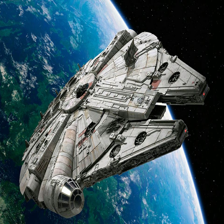

In [41]:
ufo = Image.open("ufo.jpg").resize(IMAGE_SHAPE)
ufo

In [43]:
ufo= np.array(ufo)

array([[[  3,  60,  97],
        [  0,  53,  91],
        [  1,  60,  95],
        ...,
        [  4,   6,   4],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[ 22,  83, 112],
        [ 52, 100, 134],
        [ 25,  78, 111],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[ 17,  78, 100],
        [ 77, 118, 148],
        [ 71, 118, 148],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       ...,

       [[ 59,  82,  58],
        [ 65,  86,  63],
        [ 74,  98,  79],
        ...,
        [  1,   3,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[ 62,  87,  68],
        [ 71,  94,  72],
        [ 69,  92,  70],
        ...,
        [  1,   3,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[ 45,  73,  57],
        [ 51,  73,  53],
        [ 65,  87,  64],
        ...,
        [  1,   3,   0],
        [  0,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
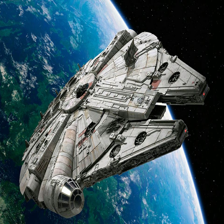

In [44]:
ufo

In [45]:
ufo_processed = tf.keras.applications.mobilenet_v2.preprocess_input(ufo)  # processing according to our model named mobilenet_v2

In [46]:
ufo_ready = ufo_processed[np.newaxis, ...]   #adding new axis (1,24,24,3) means batch contains 1 image

In [47]:
ufo_ready

array([[[[-0.9764706 , -0.5294118 , -0.23921567],
         [-1.        , -0.58431375, -0.2862745 ],
         [-0.99215686, -0.5294118 , -0.25490195],
         ...,
         [-0.96862745, -0.9529412 , -0.96862745],
         [-1.        , -0.9843137 , -1.        ],
         [-1.        , -0.9843137 , -1.        ]],

        [[-0.827451  , -0.3490196 , -0.12156862],
         [-0.5921569 , -0.21568626,  0.05098045],
         [-0.8039216 , -0.38823527, -0.12941176],
         ...,
         [-1.        , -0.9843137 , -1.        ],
         [-1.        , -0.9843137 , -1.        ],
         [-1.        , -0.9843137 , -1.        ]],

        [[-0.8666667 , -0.38823527, -0.21568626],
         [-0.3960784 , -0.0745098 ,  0.16078436],
         [-0.44313723, -0.0745098 ,  0.16078436],
         ...,
         [-1.        , -0.9843137 , -1.        ],
         [-1.        , -0.9843137 , -1.        ],
         [-1.        , -0.9843137 , -1.        ]],

        ...,

        [[-0.5372549 , -0.35686272, -0

In [48]:
result = classifier.predict(ufo_ready)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [49]:
result

array([[ 0.2905762 , -0.55146223,  0.8657738 , ..., -1.512757  ,
        -2.296199  , -0.5274618 ]], dtype=float32)

In [50]:
result  = np.argmax(result)

In [51]:
result

np.int64(819)

In [52]:
image_labels[819]

'spotlight'

testing on flower dataset


In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [6]:
data_dir

'./datasets/flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('**/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/daisy/5435513198_90ce39f1aa_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/10555826524_423eb8bf71_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/43474673_7bb4465a86.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/8681746439_d6beeefbf9.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/daisy/2646438199_b309cffd65_n.jpg')]

In [9]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

3670


In [10]:
data_dir = data_dir / 'flower_photos'

In [11]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/15820572326_be2ea4a55c_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4648680921_80dfc4f12a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15965652160_de91389965_m.jpg')]

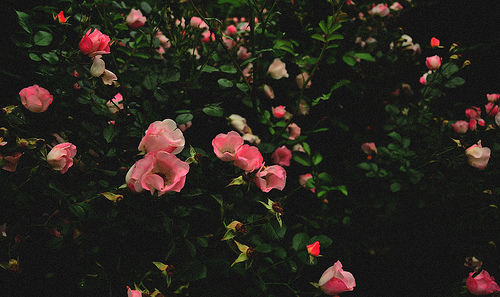

In [12]:
import PIL
PIL.Image.open(str(roses[1]))

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/15820572326_be2ea4a55c_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4648680921_80dfc4f12a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/1801614110_bb9fa46830.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5181899042_0a6ffe0c8a_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15965652160_de91389965_m.jpg')]

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][60]))

array([[[156, 164, 171],
        [167, 175, 182],
        [169, 177, 184],
        ...,
        [ 39,  52,  66],
        [ 38,  51,  65],
        [ 38,  51,  65]],

       [[158, 166, 173],
        [169, 177, 184],
        [171, 179, 186],
        ...,
        [ 38,  54,  67],
        [ 38,  54,  67],
        [ 39,  55,  68]],

       [[162, 170, 177],
        [172, 180, 187],
        [173, 181, 188],
        ...,
        [ 39,  55,  68],
        [ 40,  56,  69],
        [ 41,  57,  70]],

       ...,

       [[ 87,  88, 109],
        [ 83,  87, 111],
        [ 87,  97, 115],
        ...,
        [ 71,  64,  91],
        [121,  98, 130],
        [107,  68, 114]],

       [[ 86,  99, 101],
        [ 90,  99, 112],
        [ 87,  91, 115],
        ...,
        [ 65,  69,  80],
        [ 86,  80,  99],
        [ 80,  66,  94]],

       [[ 99, 108, 118],
        [ 94,  92, 122],
        [ 83,  70, 116],
        ...,
        [  0,   9,   7],
        [ 22,  28,  27],
        [ 14,  27,  25]]], dtype=uint8)
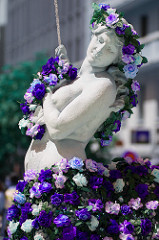

In [16]:
img

In [17]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [20]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [24]:
X[0].shape

(224, 224, 3)

In [25]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

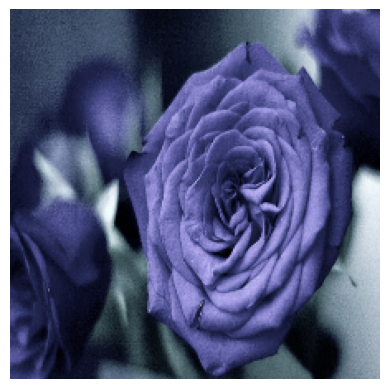

In [26]:
plt.axis('off')
plt.imshow(X[7])

In [27]:
predict = classifier.predict(np.array([X[0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [28]:
predict


array([[ 0.17242086, -1.4647219 ,  0.10814993, ..., -1.6539663 ,
        -2.2852433 ,  3.5072749 ]], dtype=float32)

In [29]:
predicted = np.argmax(predict)
predicted

np.int64(722)

In [33]:
image_labels[722]

'pillow'

model is not trained according to our flower set

we will use same model but the version where the last layer is not freezed


model - "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [35]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [36]:
# Define the number of flower classes
num_of_flowers = 5

# Create the input layer
inputs = tf.keras.Input(shape=(224, 224, 3))

# Wrap the pre-trained model in a Lambda layer to handle the symbolic input
features = tf.keras.layers.Lambda(
    lambda x: pretrained_model_without_top_layer(x)
)(inputs)

# Add a Dense layer for classification
outputs = tf.keras.layers.Dense(num_of_flowers, activation='softmax')(features)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 56s 613ms/step - acc: 0.5494 - loss: 1.1503
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 618ms/step - acc: 0.8569 - loss: 0.4283
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 621ms/step - acc: 0.8898 - loss: 0.3246
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 53s 619ms/step - acc: 0.9195 - loss: 0.2718
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 53s 619ms/step - acc: 0.9293 - loss: 0.2340


In [40]:
model.evaluate(X_test_scaled,y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 665ms/step - acc: 0.8845 - loss: 0.3427


[0.3713555335998535, 0.8671023845672607]